Problem Statement:
Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low. 

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models. 

In [1]:
#Importing required packages.


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')


In [2]:
data = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### here churn is the target so this is classification problem

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### that's very good for me that here no any null value are present

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### no null values are present

In [6]:
# checking the data type
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### we can observe that total chages has float type data but it show objective type,firstly handle this

In [7]:
data['TotalCharges'].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [8]:
data['TotalCharges'].nunique()

6531

In [9]:
data.shape

(7043, 21)

In [10]:
data.loc[data['TotalCharges']== " "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


#### there is some spaces a the value

In [11]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan)

In [12]:
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### converting the column from object type to float

In [13]:
data['TotalCharges'] = data['TotalCharges'].astype(float)

In [14]:
data.TotalCharges.dtype

dtype('float64')

### handling the null values using mean method

In [15]:
np.mean(data['TotalCharges'])

2283.3004408418697

In [16]:
data.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges                 NaN
Churn                         No
Name: 6670, dtype: object

In [17]:
data['TotalCharges'] = data['TotalCharges'].fillna(np.mean(data['TotalCharges']))

In [18]:
data.iloc[6670,:]

customerID            4075-WKNIU
gender                    Female
SeniorCitizen                  0
Partner                      Yes
Dependents                   Yes
tenure                         0
PhoneService                 Yes
MultipleLines                Yes
InternetService              DSL
OnlineSecurity                No
OnlineBackup                 Yes
DeviceProtection             Yes
TechSupport                  Yes
StreamingTV                  Yes
StreamingMovies               No
Contract                Two year
PaperlessBilling              No
PaymentMethod       Mailed check
MonthlyCharges             73.35
TotalCharges         2283.300441
Churn                         No
Name: 6670, dtype: object

In [19]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### now again check the data type

In [20]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

### Nominal Data

In [21]:
data_nominal= data[['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'Churn']].copy()

In [22]:
data_nominal.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

## Visualization of the data

# EDA

Male      3555
Female    3488
Name: gender, dtype: int64


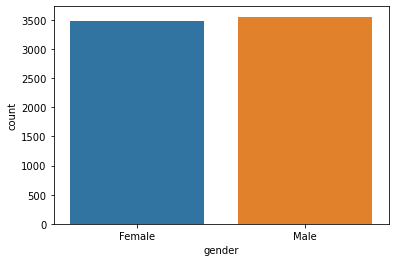

In [23]:
ax= sns.countplot(x='gender',data=data_nominal)
print(data_nominal["gender"].value_counts())

0    5901
1    1142
Name: SeniorCitizen, dtype: int64


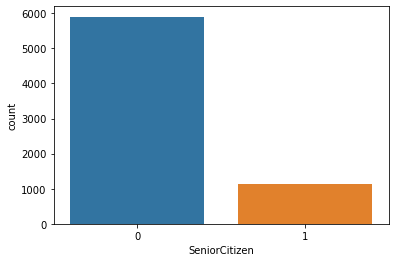

In [24]:
ax= sns.countplot(x='SeniorCitizen',data=data_nominal)
print(data_nominal["SeniorCitizen"].value_counts())

No     3641
Yes    3402
Name: Partner, dtype: int64


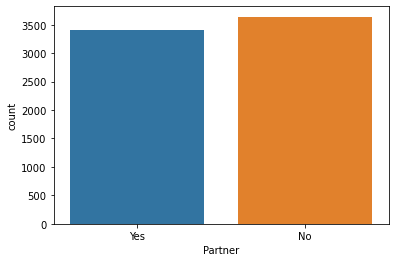

In [25]:
ax= sns.countplot(x='Partner',data=data_nominal)
print(data_nominal['Partner'].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


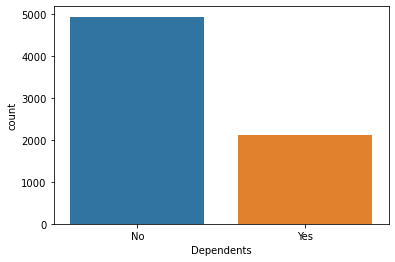

In [26]:
ax= sns.countplot(x='Dependents',data=data_nominal)
print(data_nominal['Dependents'].value_counts())

Yes    6361
No      682
Name: PhoneService, dtype: int64


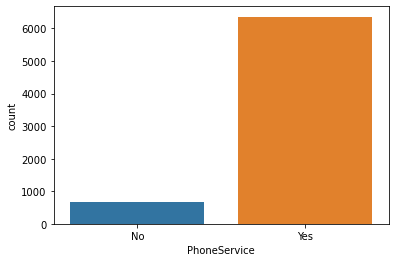

In [27]:
ax= sns.countplot(x='PhoneService',data=data_nominal)
print(data_nominal['PhoneService'].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


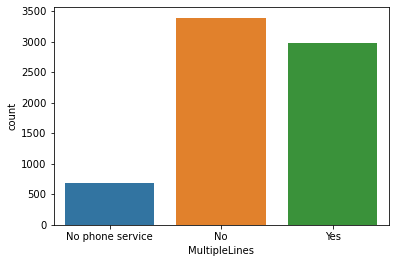

In [28]:
ax= sns.countplot(x='MultipleLines',data=data_nominal)
print(data_nominal['MultipleLines'].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


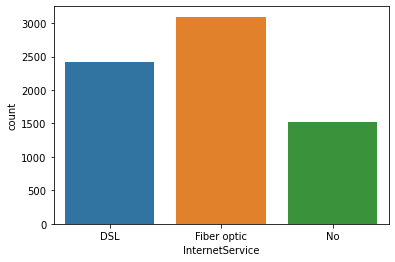

In [29]:
ax= sns.countplot(x='InternetService',data=data_nominal)
print(data_nominal['InternetService'].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


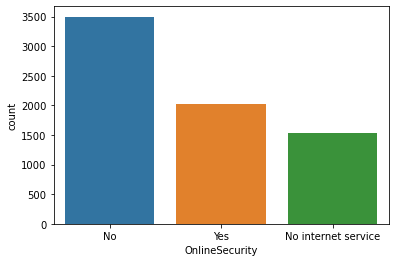

In [30]:
ax= sns.countplot(x='OnlineSecurity',data=data_nominal)
print(data_nominal['OnlineSecurity'].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


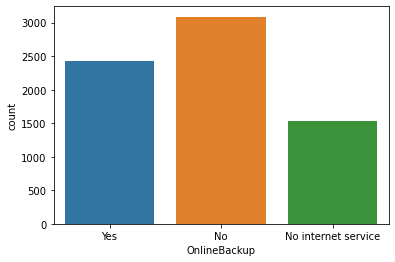

In [31]:
ax= sns.countplot(x='OnlineBackup',data=data_nominal)
print(data_nominal['OnlineBackup'].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


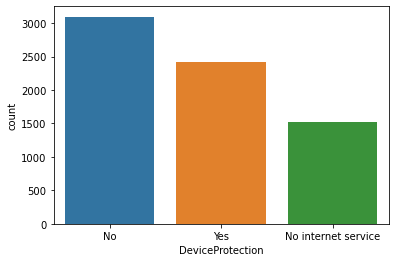

In [32]:
ax= sns.countplot(x='DeviceProtection',data=data_nominal)
print(data_nominal['DeviceProtection'].value_counts())

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


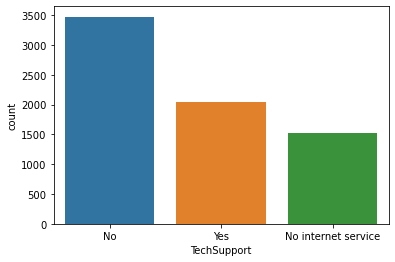

In [33]:
ax= sns.countplot(x='TechSupport',data=data_nominal)
print(data_nominal['TechSupport'].value_counts())

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


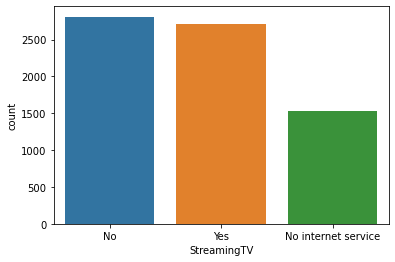

In [34]:
ax= sns.countplot(x='StreamingTV',data=data_nominal)
print(data_nominal['StreamingTV'].value_counts())

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


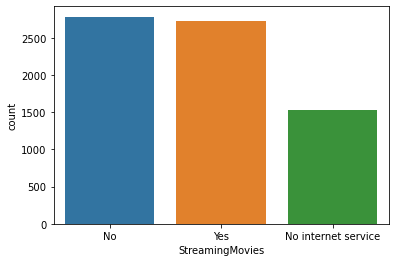

In [35]:
ax= sns.countplot(x='StreamingMovies',data=data_nominal)
print(data_nominal['StreamingMovies'].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


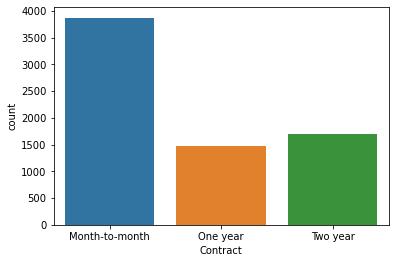

In [36]:
ax= sns.countplot(x='Contract',data=data_nominal)
print(data_nominal['Contract'].value_counts())

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


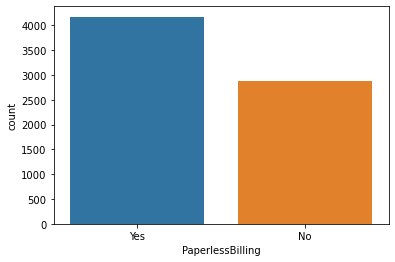

In [37]:
ax= sns.countplot(x='PaperlessBilling',data=data_nominal)
print(data_nominal['PaperlessBilling'].value_counts())

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


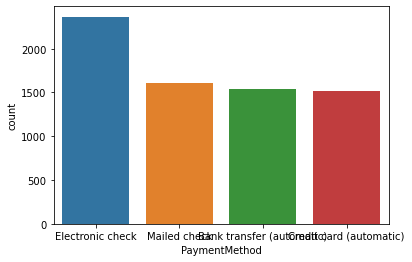

In [38]:
ax= sns.countplot(x='PaymentMethod',data=data_nominal)
print(data_nominal['PaymentMethod'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64


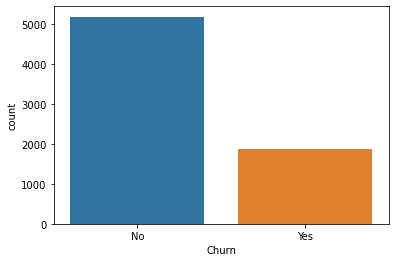

In [39]:
ax= sns.countplot(x='Churn',data=data_nominal)
print(data_nominal['Churn'].value_counts())

#### here churn column is not balanced so it should balance.

### very less coustomer want to switch.

### related with target column

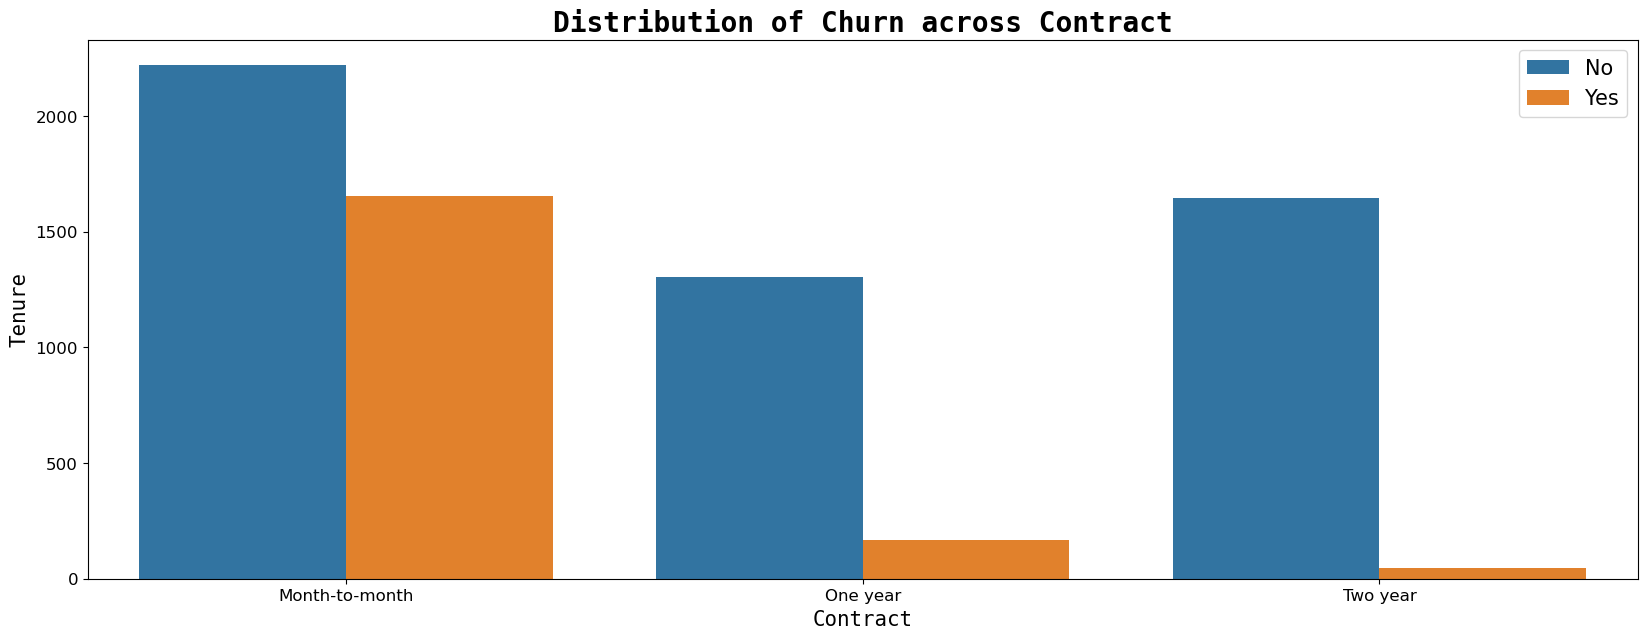

In [40]:
# Creating a countplot of churn across contract
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['Contract'], hue=data['Churn'])
plt.title('Distribution of Churn across Contract', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Contract', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

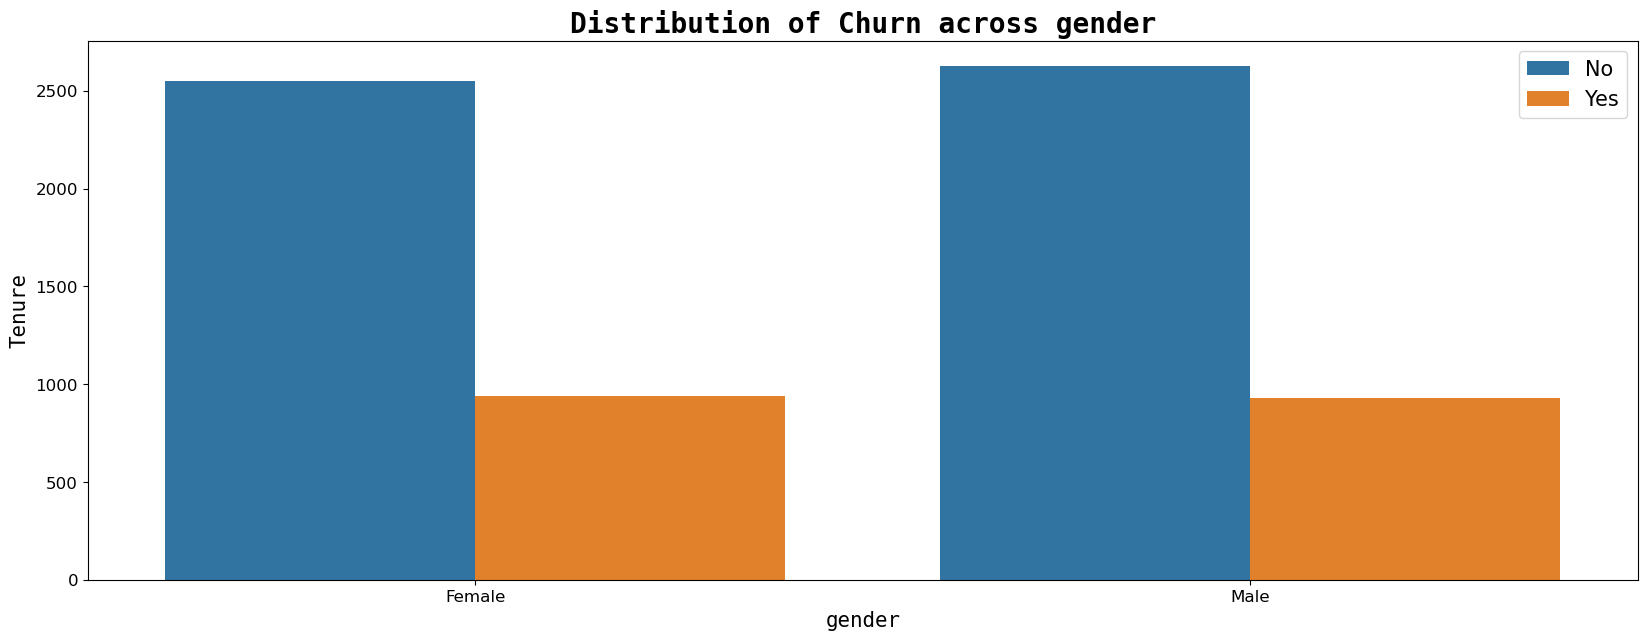

In [41]:
# Creating a countplot of churn across gender
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['gender'], hue=data['Churn'])
plt.title('Distribution of Churn across gender', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('gender', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

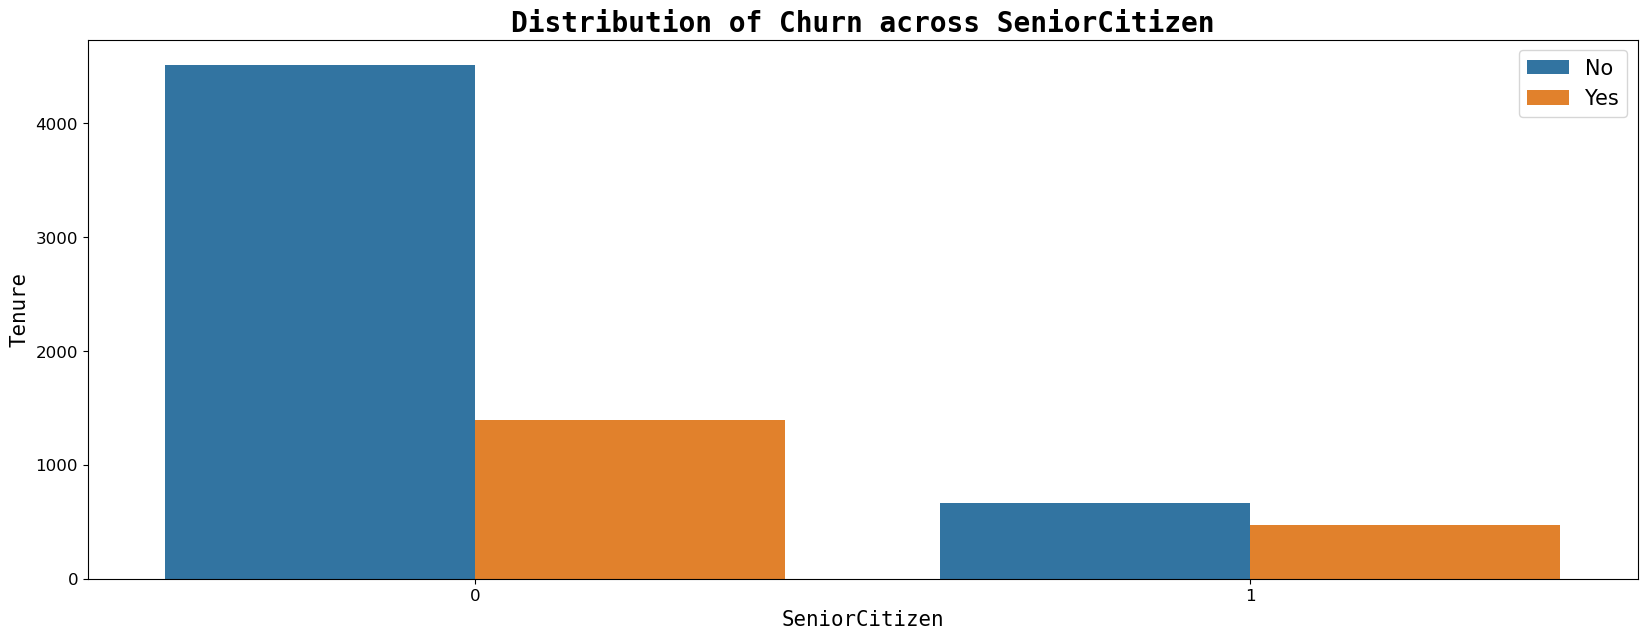

In [42]:
# Creating a countplot of churn across SeniorCitizen
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['SeniorCitizen'], hue=data['Churn'])
plt.title('Distribution of Churn across SeniorCitizen', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('SeniorCitizen', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

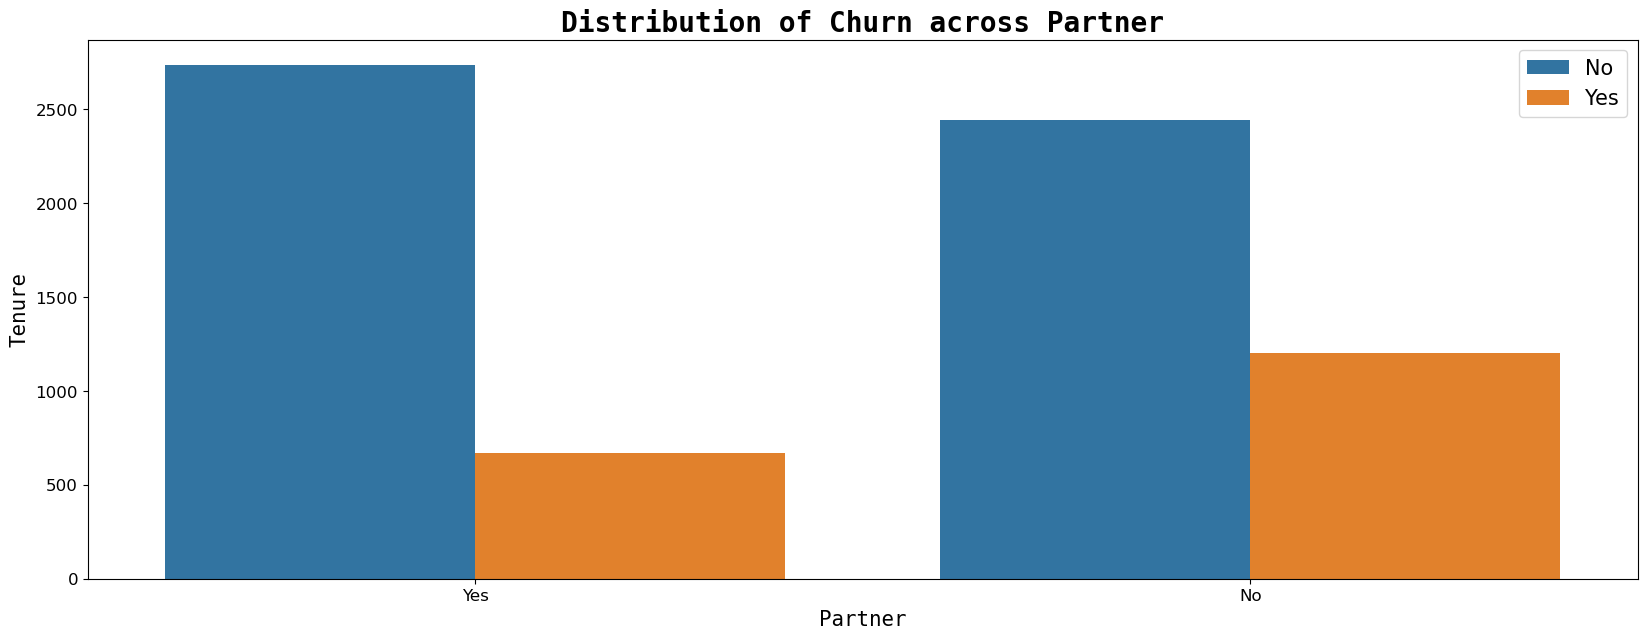

In [43]:
# Creating a countplot of churn across Partner
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['Partner'], hue=data['Churn'])
plt.title('Distribution of Churn across Partner', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Partner', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

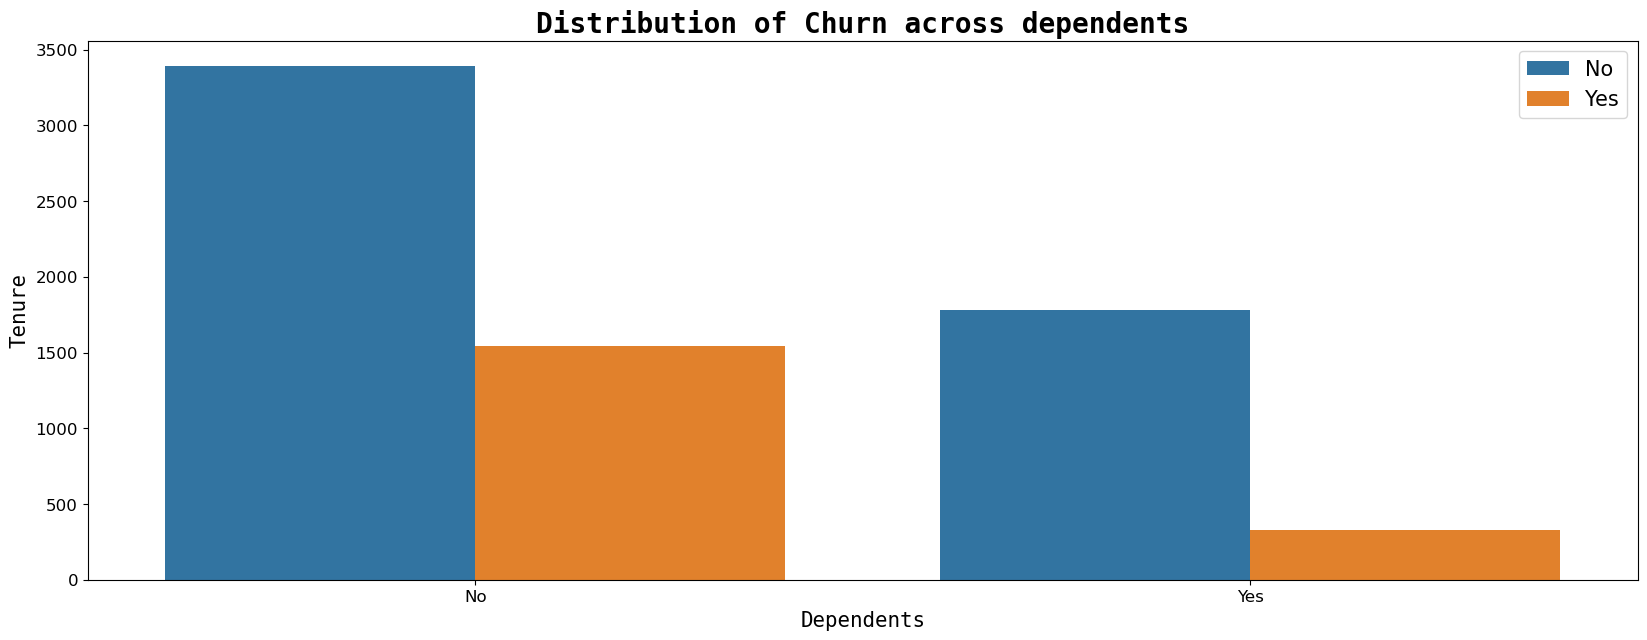

In [44]:
# Creating a countplot of churn across dependents
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['Dependents'], hue=data['Churn'])
plt.title('Distribution of Churn across dependents', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('Dependents', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

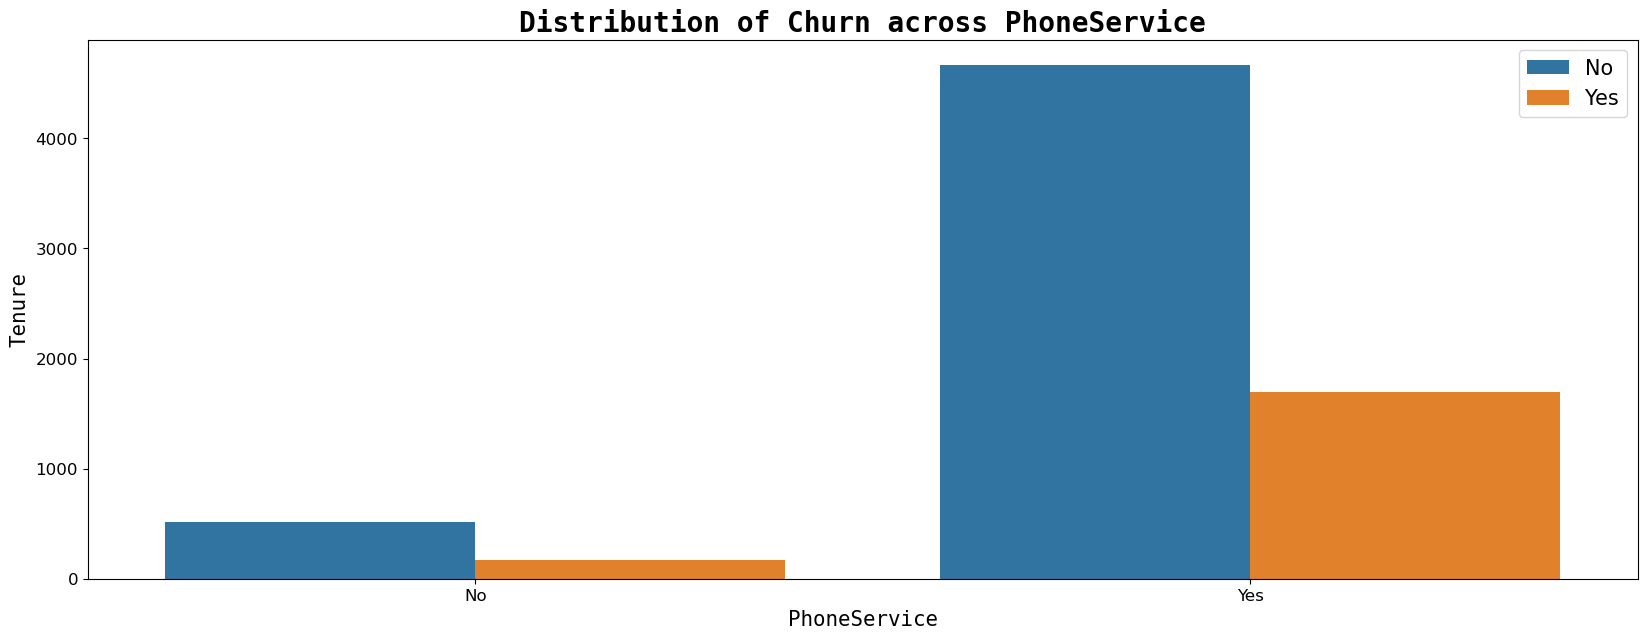

In [45]:
# Creating a countplot of churn across Phoneservices
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['PhoneService'], hue=data['Churn'])
plt.title('Distribution of Churn across PhoneService', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('PhoneService', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

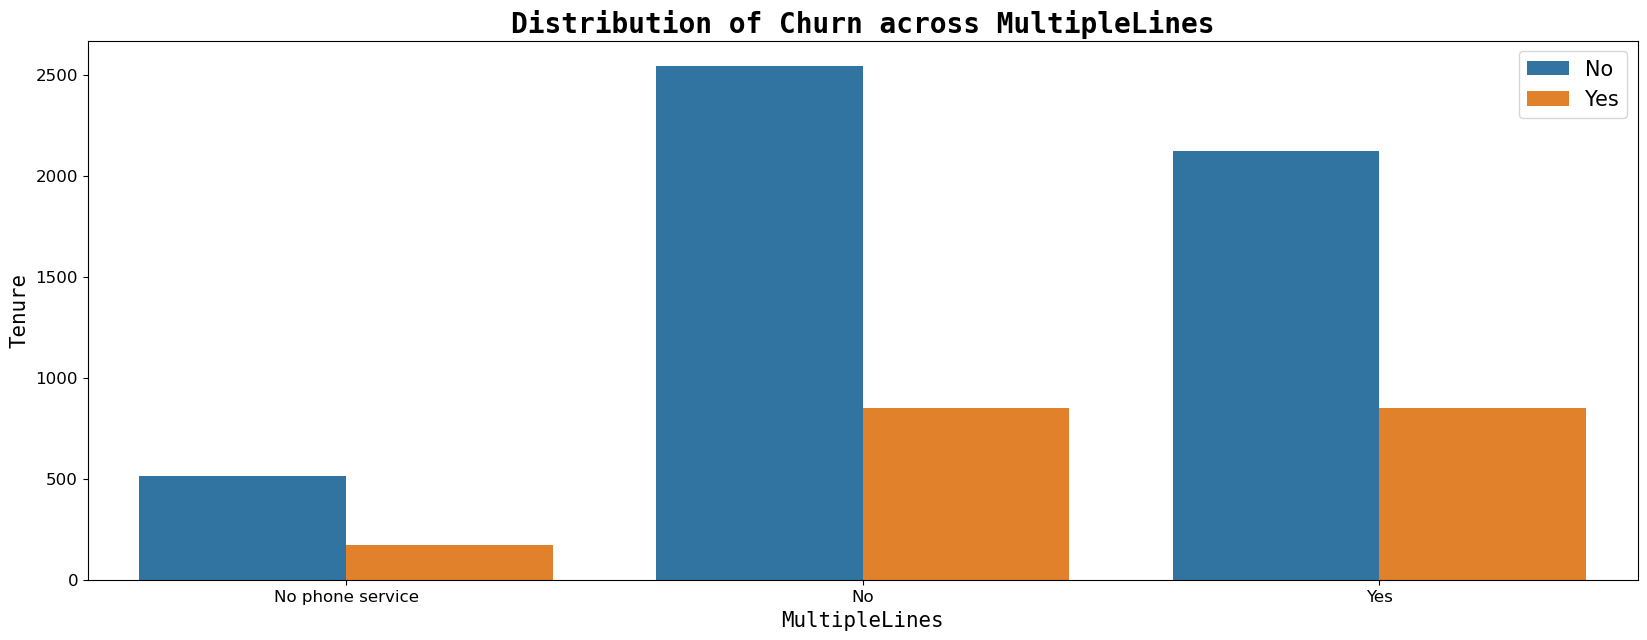

In [46]:
# Creating a countplot of churn across MultipleLines
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['MultipleLines'], hue=data['Churn'])
plt.title('Distribution of Churn across MultipleLines', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('MultipleLines', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

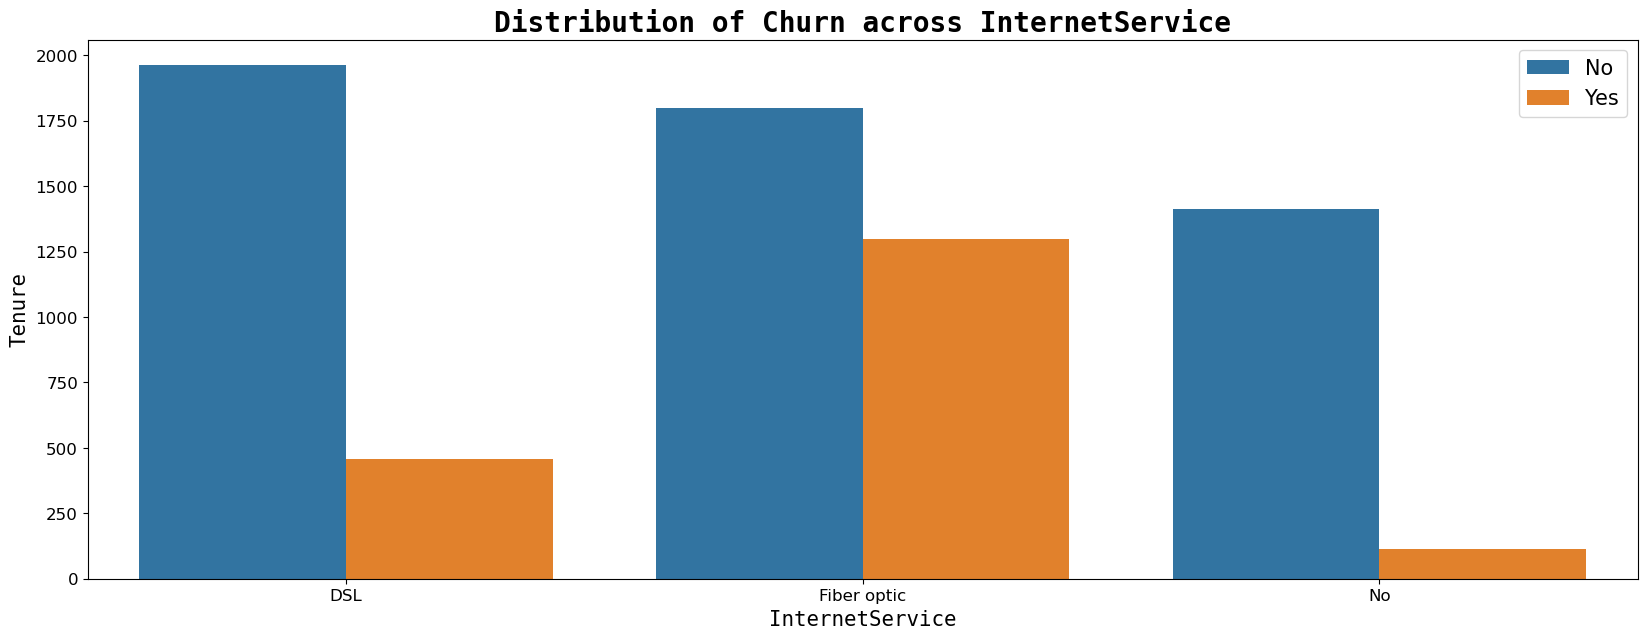

In [47]:
# Creating a countplot of churn across InternetServices
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['InternetService'], hue=data['Churn'])
plt.title('Distribution of Churn across InternetService', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('InternetService', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

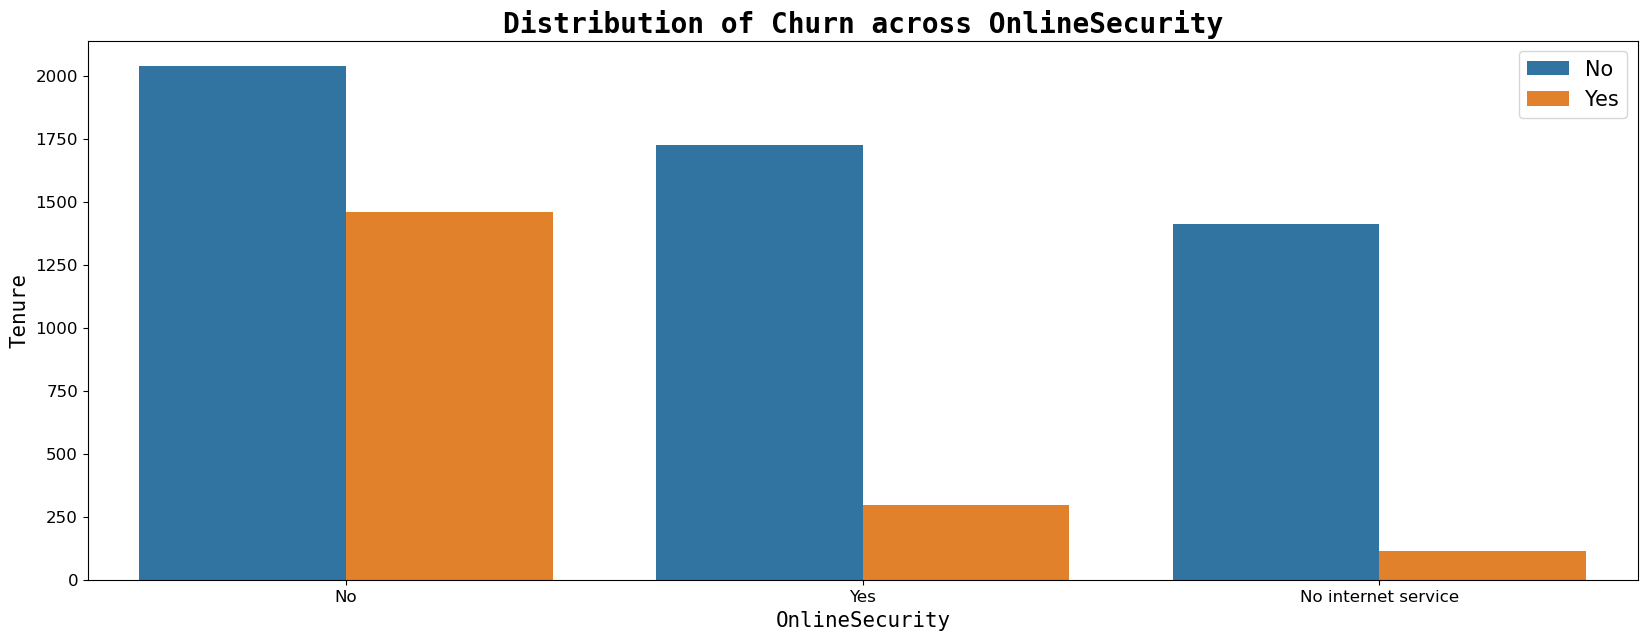

In [48]:
# Creating a countplot of churn across OnlineSecurity
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['OnlineSecurity'], hue=data['Churn'])
plt.title('Distribution of Churn across OnlineSecurity', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('OnlineSecurity', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

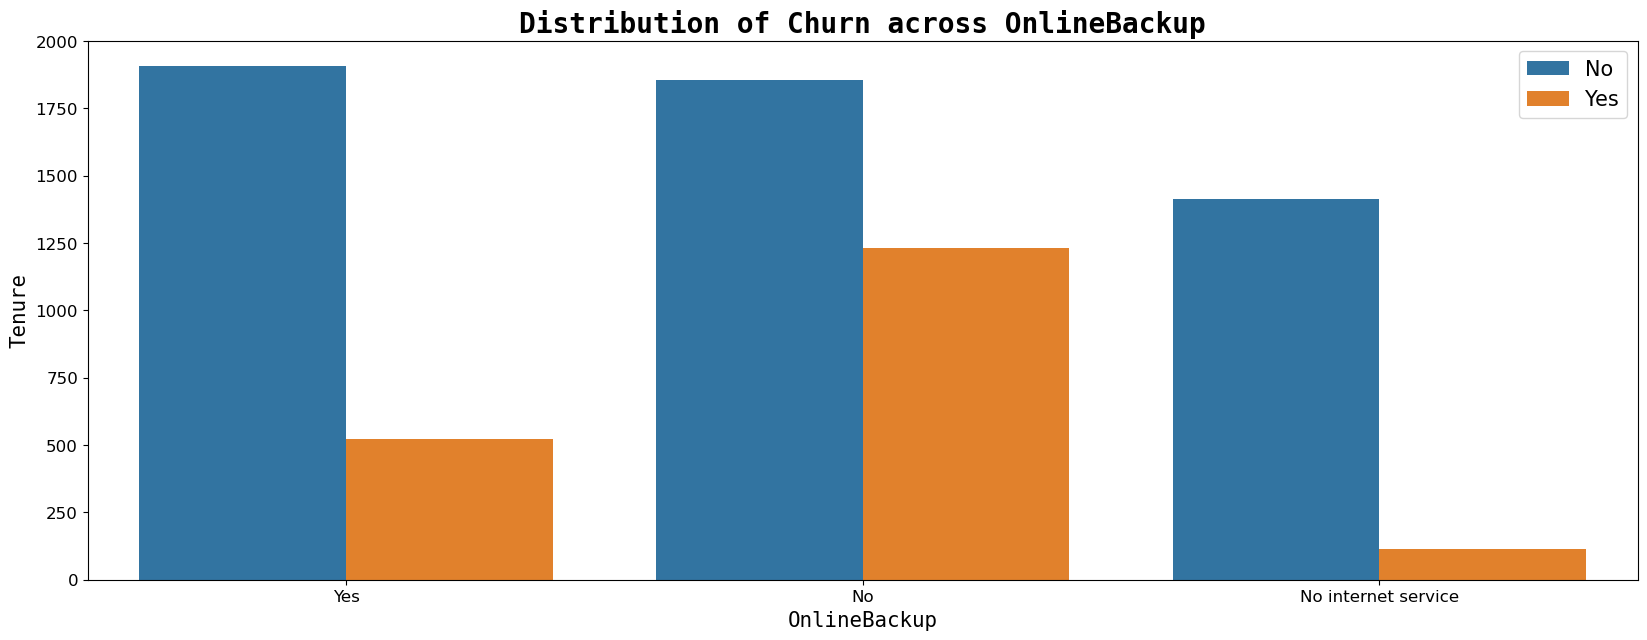

In [49]:
# Creating a countplot of churn across OnlineBackup
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['OnlineBackup'], hue=data['Churn'])
plt.title('Distribution of Churn across OnlineBackup', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('OnlineBackup', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

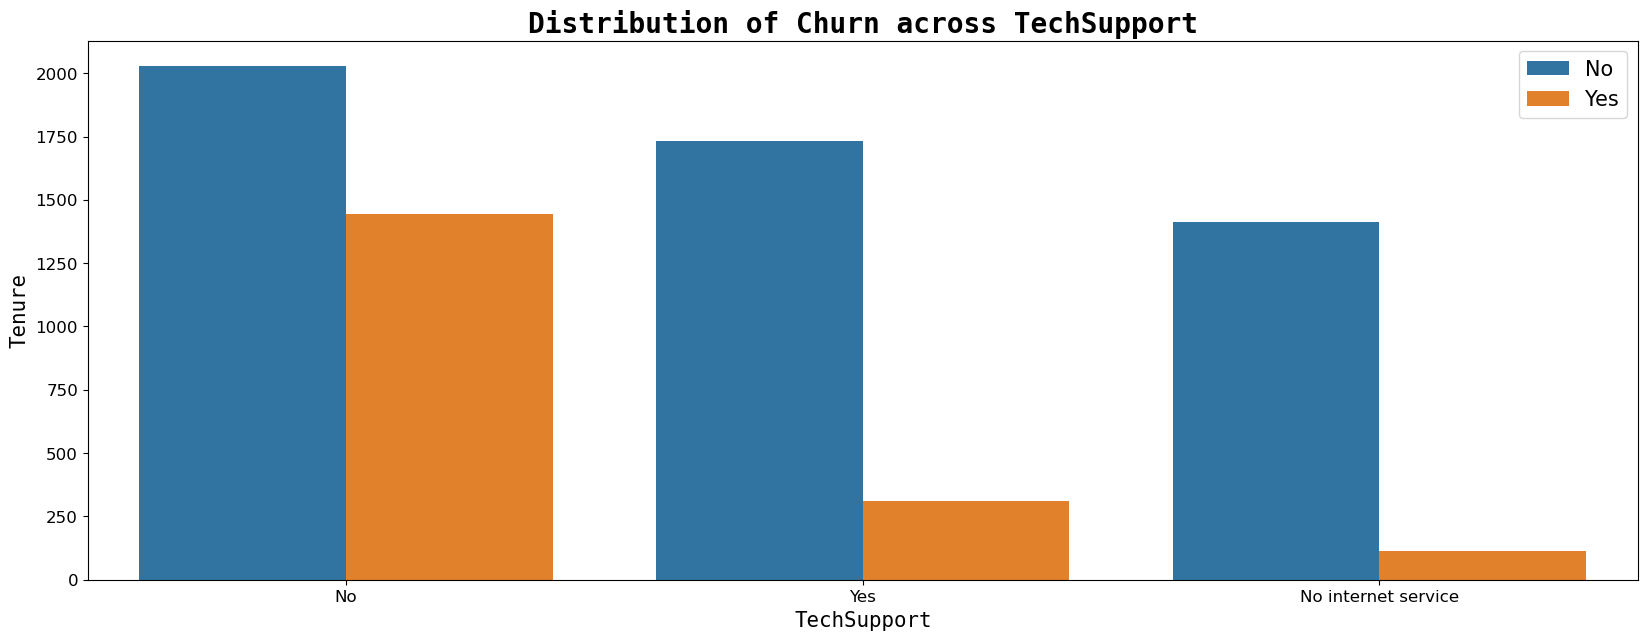

In [50]:
# Creating a countplot of churn across Techsupport
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['TechSupport'], hue=data['Churn'])
plt.title('Distribution of Churn across TechSupport', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('TechSupport', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

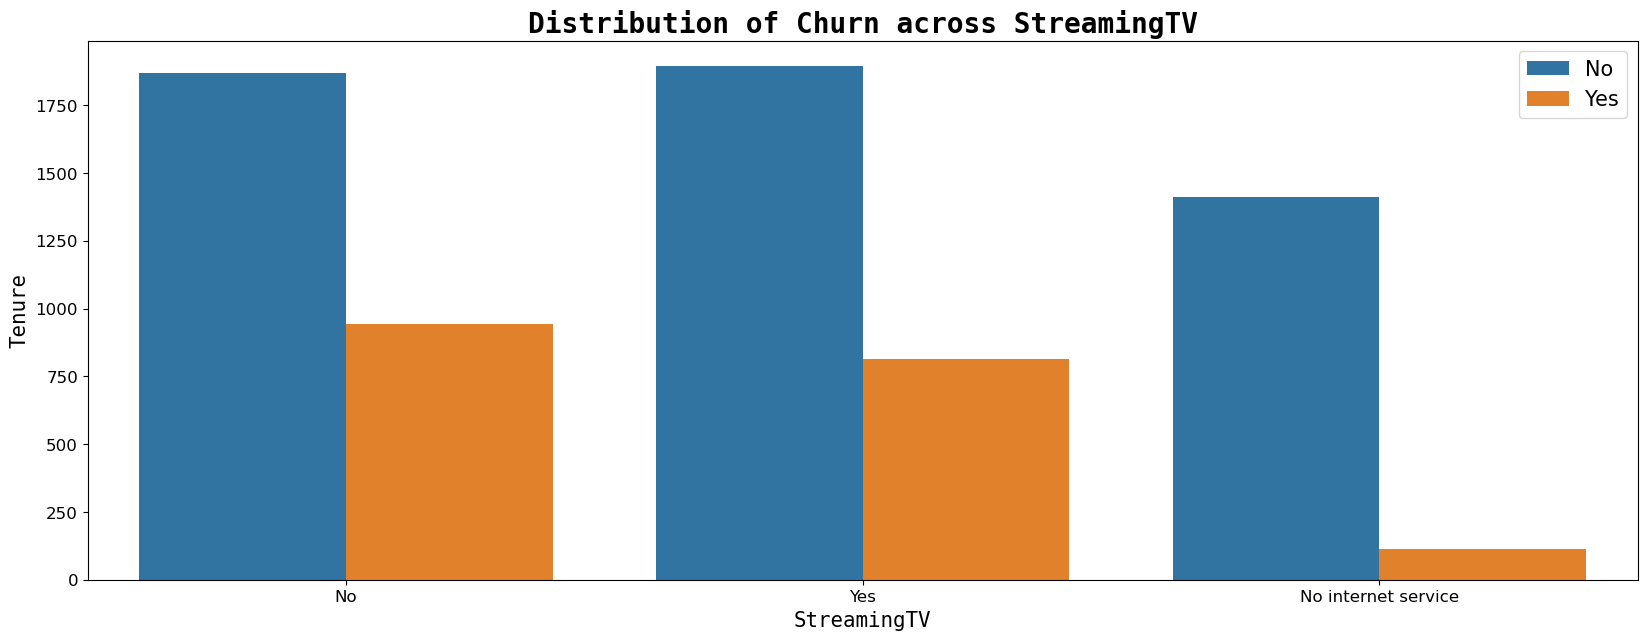

In [51]:
# Creating a countplot of churn across StreamingTV
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['StreamingTV'], hue=data['Churn'])
plt.title('Distribution of Churn across StreamingTV', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('StreamingTV', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

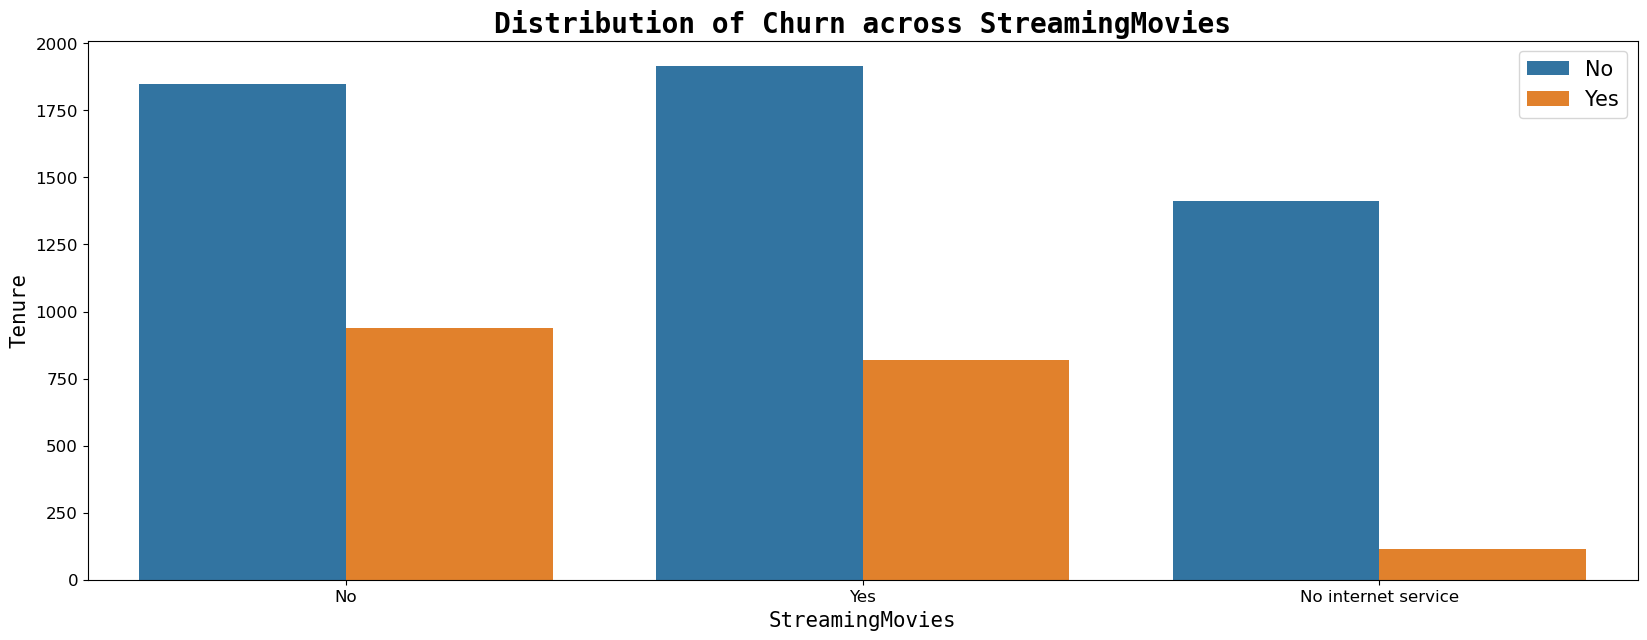

In [52]:
# Creating a countplot of churn across StreamingMovies
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['StreamingMovies'], hue=data['Churn'])
plt.title('Distribution of Churn across StreamingMovies', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('StreamingMovies', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

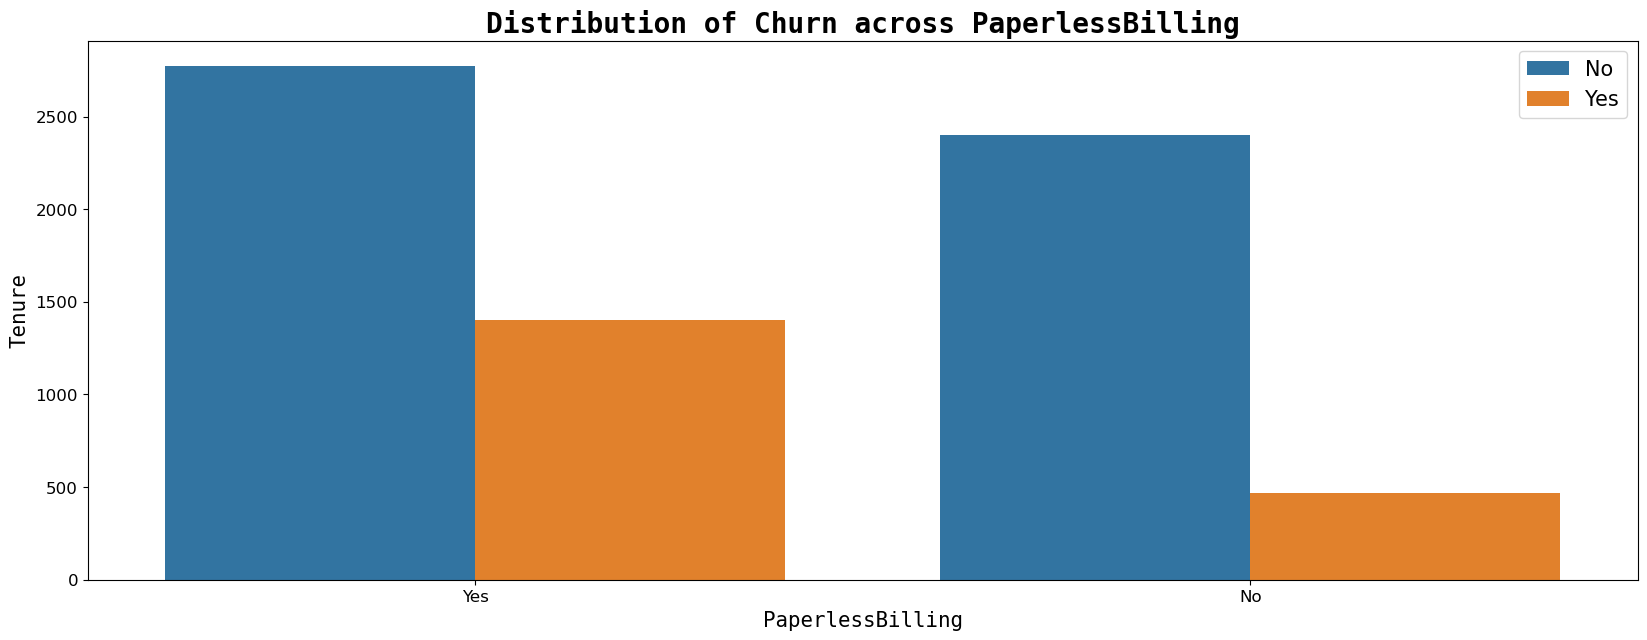

In [53]:
# Creating a countplot of churn across PaperlessBilling
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['PaperlessBilling'], hue=data['Churn'])
plt.title('Distribution of Churn across PaperlessBilling', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('PaperlessBilling', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

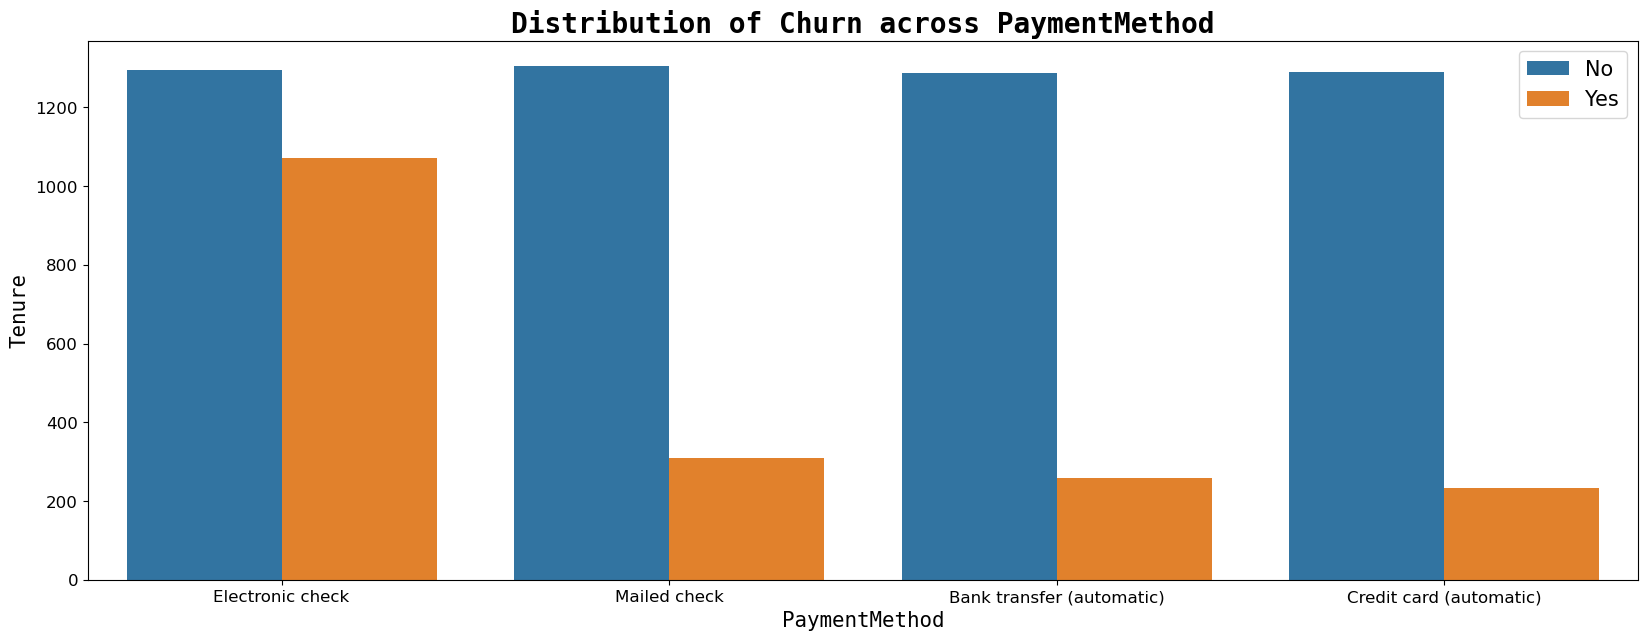

In [54]:
# Creating a countplot of churn across PaymentMethod
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['PaymentMethod'], hue=data['Churn'])
plt.title('Distribution of Churn across PaymentMethod', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('PaymentMethod', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('Tenure', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

### Making Dataframe for the Ordinal data

In [55]:
data_Ordinal=data[['customerID','tenure']].copy()

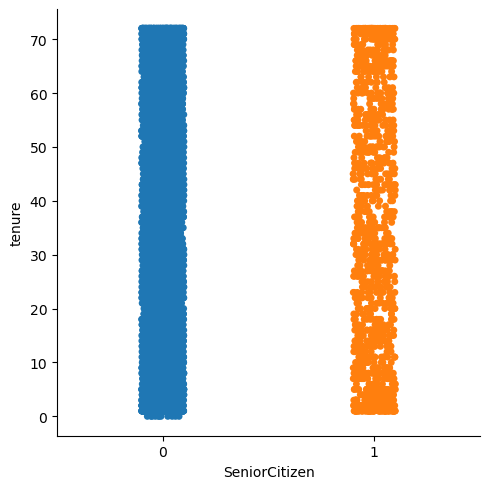

In [56]:
sns.catplot(x='SeniorCitizen',y='tenure',data=data)

#### here catogiracal visualization part is finished

### Checking The Distribution of the Continous value of the float type column

In [57]:
data_continuous = data[['MonthlyCharges','TotalCharges']].copy()

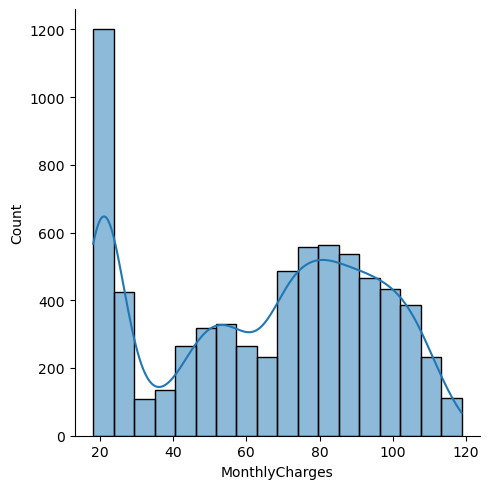

In [58]:
sns.displot(data_continuous['MonthlyCharges'],kde=True)

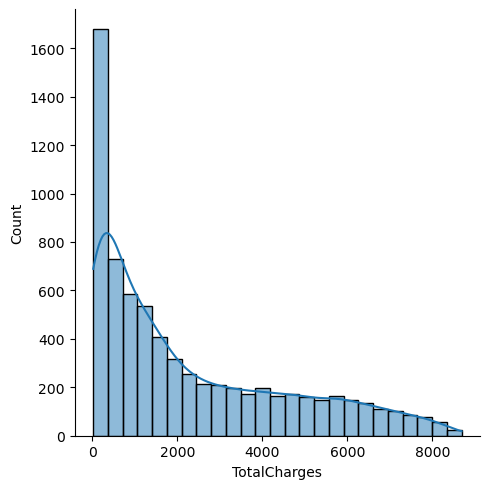

In [59]:
sns.displot(data_continuous['TotalCharges'],kde=True)

### here visualization part is finished

#### This dataset has lots of string value, so it should be convert in numerical value.

## Encoding dataframe

In [60]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [61]:
for i in data.columns:
    if data[i].dtypes=="object":
        data[i]=enc.fit_transform(data[i].values.reshape(-1,1))

In [62]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,29.85,0.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,...,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1840.75,0.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7040,3367.0,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,346.45,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


### Describe the dataset

In [63]:
data.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,...,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,...,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,2283.300441,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,...,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,2265.000258,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,402.225000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,1400.550000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,3786.600000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,8684.800000,1.000000


In [64]:
# Checking the counts of label categories
churn = data['Churn'].value_counts(normalize=True)
round(churn * 100, 2).astype('str') + ' %'

0.0    73.46 %
1.0    26.54 %
Name: Churn, dtype: object

#### The dataset is unbalanced, as the dependent feature 'churn' contains 73.46% values have 0.00 and 26.54% values have 1.0.

<AxesSubplot:>

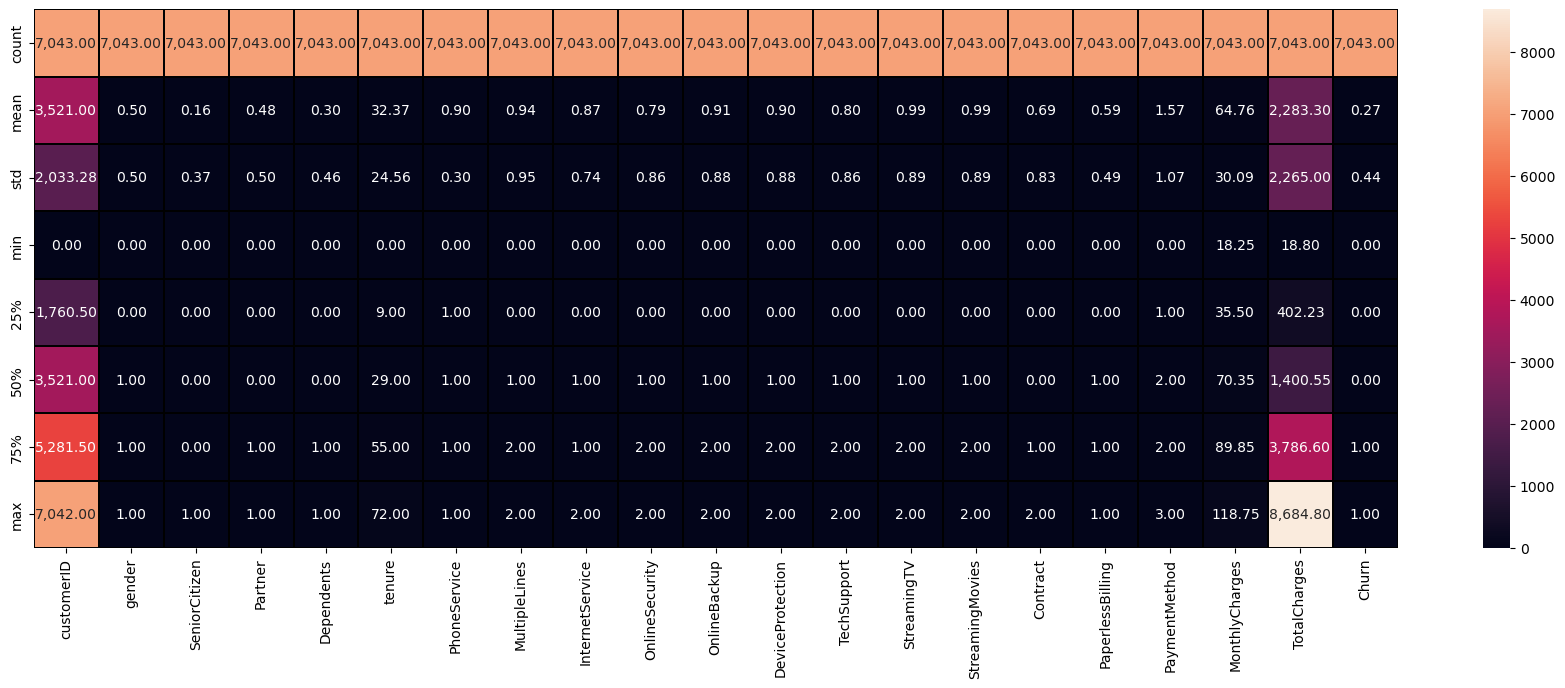

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(data.describe(),annot=True,linewidths=0.1,linecolor="black",fmt="0,.2f")


## Correlation between target and features

In [66]:
data.corr()['Churn'].sort_values()

Contract           -0.396713
tenure             -0.352229
OnlineSecurity     -0.289309
TechSupport        -0.282492
TotalCharges       -0.199428
OnlineBackup       -0.195525
DeviceProtection   -0.178134
Dependents         -0.164221
Partner            -0.150448
InternetService    -0.047291
StreamingMovies    -0.038492
StreamingTV        -0.036581
customerID         -0.017447
gender             -0.008612
PhoneService        0.011942
MultipleLines       0.038037
PaymentMethod       0.107062
SeniorCitizen       0.150889
PaperlessBilling    0.191825
MonthlyCharges      0.193356
Churn               1.000000
Name: Churn, dtype: float64

<AxesSubplot:>

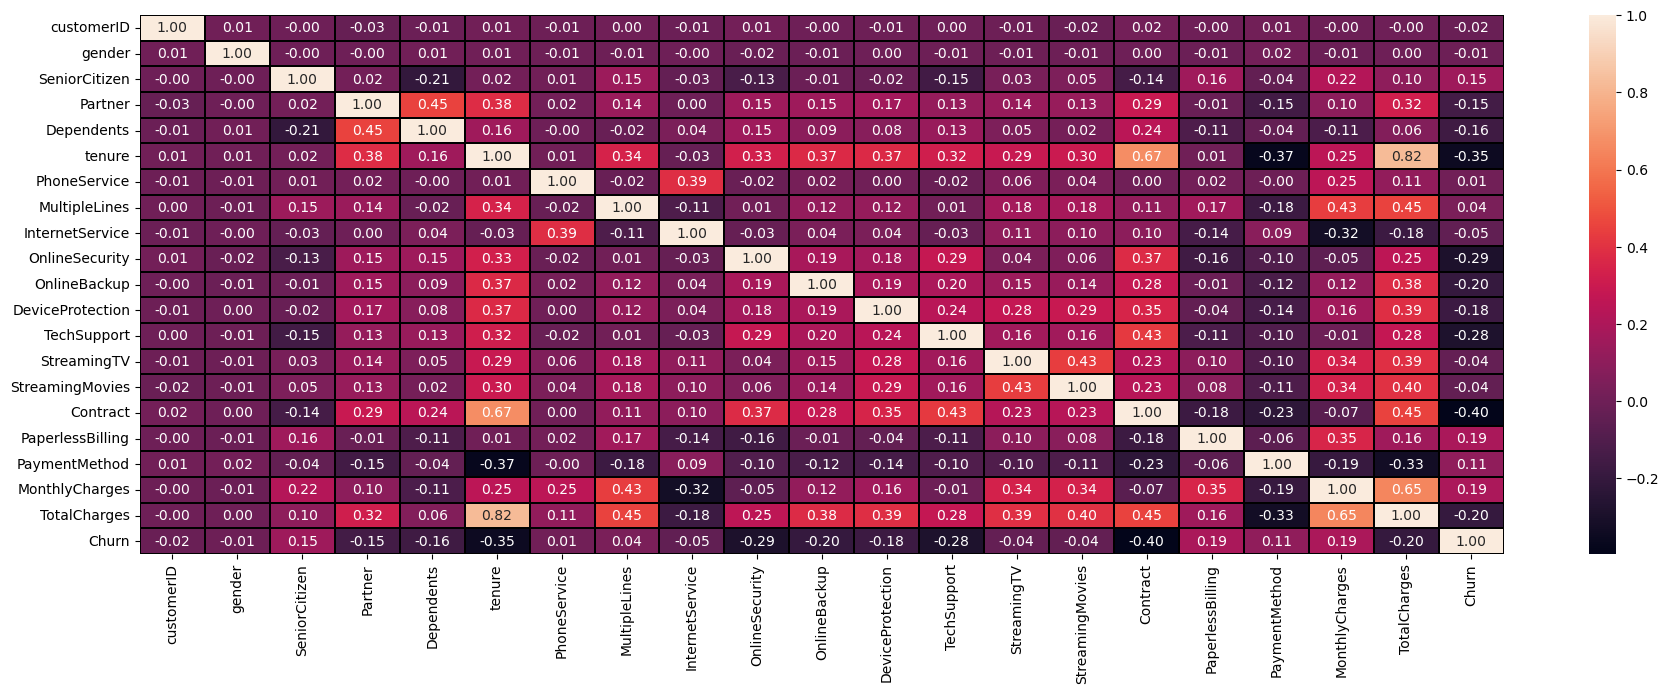

In [67]:
plt.figure(figsize=(22,7))
sns.heatmap(data.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0,.2f")


### here only total chages and tenure is hifghly corelated to each other. no any other feature corelated to like this. so  we not use multi colinearity function.

#### using line plot to see the graph of relation

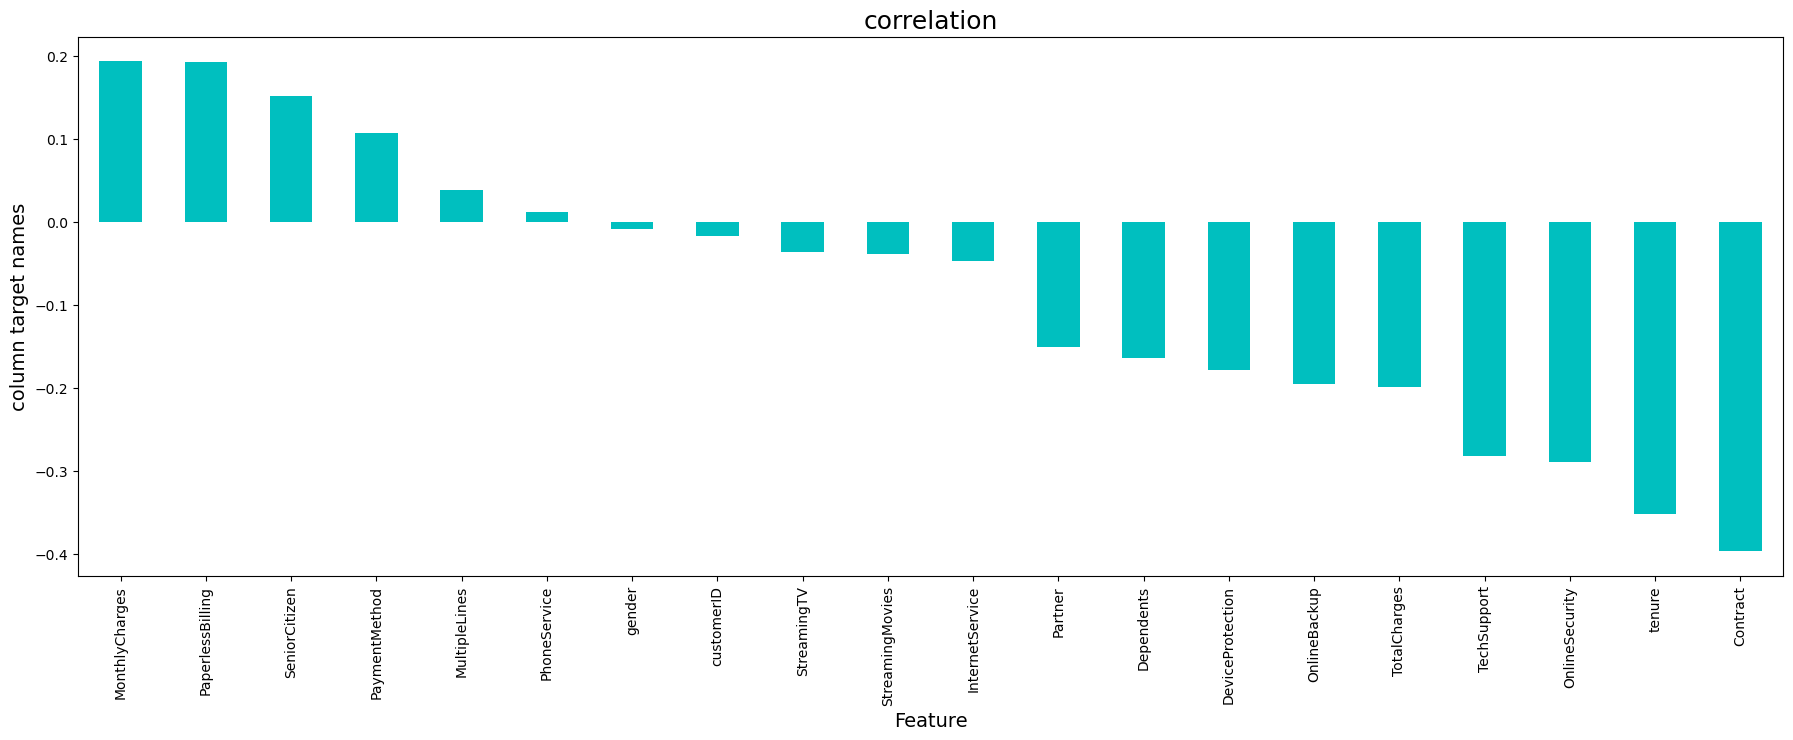

In [68]:
plt.figure(figsize=(22,7))
data.corr()['Churn'].sort_values(ascending=False).drop(['Churn']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

### here no column is highly correlated to  target column. but contact , tenure, onlinesecurity is negative related to target column

## check skewness

In [69]:
data.skew()

customerID          0.000000
gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.962394
Churn               1.063031
dtype: float64

#### keeping +/-0.5 as the range for skewness ,here are the columns which does not lie within this range.seniorcitizen,dependents,phone services,contract are categorical data. so we do not remove from this column.but total charges is contious value.

In [72]:
data.dtypes

customerID          float64
gender              float64
SeniorCitizen         int64
Partner             float64
Dependents          float64
tenure                int64
PhoneService        float64
MultipleLines       float64
InternetService     float64
OnlineSecurity      float64
OnlineBackup        float64
DeviceProtection    float64
TechSupport         float64
StreamingTV         float64
StreamingMovies     float64
Contract            float64
PaperlessBilling    float64
PaymentMethod       float64
MonthlyCharges      float64
TotalCharges        float64
Churn               float64
dtype: object

In [74]:
# create function to generate box plot
plots={1:[111],2:[121,122],3:[131,132,133],4:[221,222,223,224],5:[231,232,233,234,235],6:[231,232,233,234,235,236]}
def boxplot(x,y,data):
    rows=int(str(plots[len(y)][0])[0])
    columns=int(str(plots[len(y)][0])[1])
    plt.figure(figsize=(7*columns,7*rows))
    
    for i,j in enumerate(y):
        plt.subplot(plots[len(y)][i])
        ax=sns.boxplot(x=x,y=j,data=data[[x,j]],palette='Blues',linewidth=1)
        ax.set_title(j)
        return plt.show()

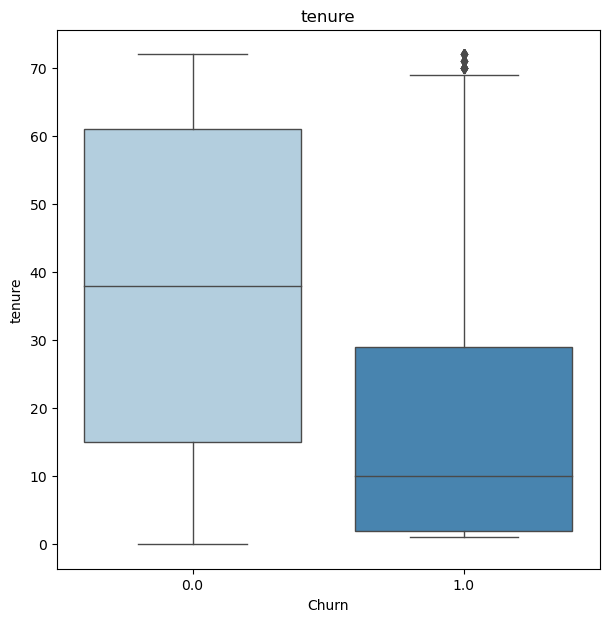

In [79]:
boxplot("Churn",["tenure"],data)

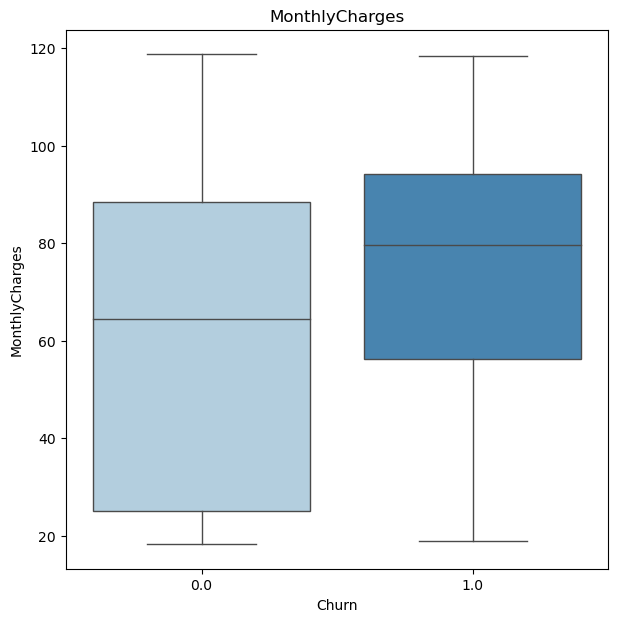

In [80]:
boxplot("Churn",["MonthlyCharges"],data)

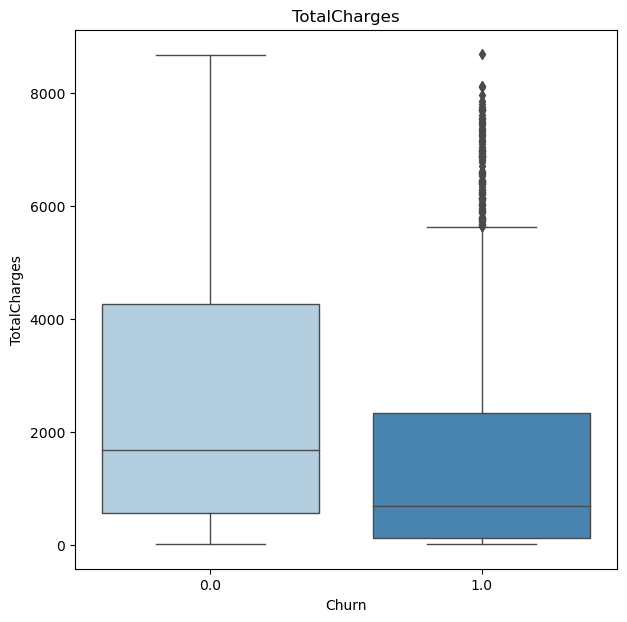

In [81]:
boxplot("Churn",["TotalCharges"],data)

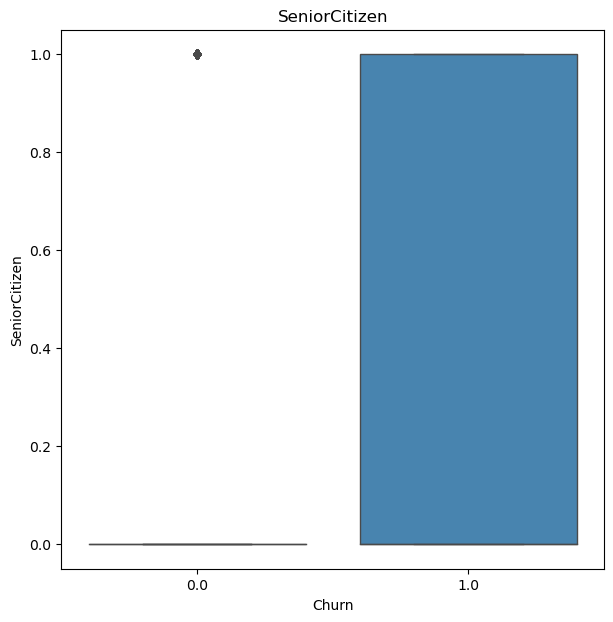

In [93]:
boxplot("Churn",["SeniorCitizen"],data)

In [91]:

numerical_features = ["TotalCharges","MonthlyCharges","tenure"]
data_num = data[numerical_features]
data_num.describe()
Q1 = data_num.quantile(0.25)
Q3 = data_num.quantile(0.75)
IQR = Q3-Q1
IQR
((data_num<(Q1-1.5*IQR))|(data_num>(Q3+1.5*IQR))).any()
        

TotalCharges      False
MonthlyCharges    False
tenure            False
dtype: bool

In [92]:
data.shape

(7043, 21)

### No outliers in numerical features detected with the IQR method — no adjustments made.

### Appliyng Zscore method for removing

In [95]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(data))
threshold=3
np.where(z>3)

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
         114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
         215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
         278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
         387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
         544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
         677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
         829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
         934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
        1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
        1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
        1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
        1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
        1614, 1620, 1634, 1637, 1652, 

In [97]:
data_new_z=data[(z<3).all(axis=1)]
data_new_z

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,...,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1889.50,0.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,108.15,1.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,151.65,1.0
5,6551.0,0.0,0,0.0,0.0,8,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,0.0,1.0,2.0,99.65,820.50,1.0
6,1002.0,1.0,0,0.0,1.0,22,1.0,2.0,1.0,0.0,...,0.0,0.0,2.0,0.0,0.0,1.0,1.0,89.10,1949.40,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,1758.0,0.0,0,0.0,0.0,72,1.0,0.0,2.0,1.0,...,1.0,1.0,1.0,1.0,2.0,1.0,0.0,21.15,1419.40,0.0
7038,4853.0,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,...,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1990.50,0.0
7039,1525.0,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,...,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,7362.90,0.0
7041,5934.0,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,306.60,1.0


In [98]:
data_new_z.shape

(6361, 21)

#### my data is biased and not necessary  to removing outliers.

### Seperating the column into features and target

In [99]:
X = data.drop("Churn",axis=1)
Y = data["Churn"]

## Feature Scaling

In [101]:
from sklearn.preprocessing import StandardScaler

In [102]:
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

## Fixing imbalanced dataset using Oversampling

In [103]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0.0    73.46 %
1.0    26.54 %
Name: Churn, dtype: object

In [104]:
from imblearn.over_sampling import RandomOverSampler 

In [105]:
ros = RandomOverSampler(random_state=42)

In [106]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [107]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [108]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0.0    50.0 %
1.0    50.0 %
Name: Churn, dtype: object

## Creating a train test split

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_resampled, Y_resampled, test_size=0.2, random_state=42)

In [111]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)

X_train shape: (8278, 20)
X_test shape: (2070, 20)
Y_train shape: (8278,)
Y_test shape: (2070,)


## Data Modelling

# 1.. Logistic Regression

In [112]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)

In [113]:
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=42)

In [114]:
Y_pred_log_reg = log_reg.predict(X_test)

## 2... KNN Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)

KNeighborsClassifier()

In [116]:
Y_pred_knn = knn.predict(X_test)

## 3...Support Vector Classifier

In [117]:
from sklearn.svm import SVC
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)

SVC(random_state=42)

In [118]:
Y_pred_svc = svc.predict(X_test)

## 4: Naive Bayes Classifier

In [119]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

In [120]:
Y_pred_nb = nb.predict(X_test)

## 5: Decision Tree Classifier

In [121]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [122]:
Y_pred_dec_tree = dec_tree.predict(X_test)

## 6: Random Forest Classifier

In [123]:
from sklearn.ensemble import RandomForestClassifier
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [124]:
Y_pred_ran_for = ran_for.predict(X_test)

## Model Evaluation

In [125]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [126]:
print('Logistic Regression:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_log_reg) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_log_reg) * 100, 2))

Logistic Regression:
Accuracy score: 78.02
F1 score: 79.1


In [127]:
print('KNN Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_knn) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_knn) * 100, 2))

KNN Classifier:
Accuracy score: 78.26
F1 score: 80.43


In [128]:
print('Support Vector Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_svc) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_svc) * 100, 2))

Support Vector Classifier:
Accuracy score: 80.77
F1 score: 81.76


In [129]:
print('Naive Bayes Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_nb) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_nb) * 100, 2))

Naive Bayes Classifier:
Accuracy score: 76.52
F1 score: 77.52


In [130]:
print('Decision Tree Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_dec_tree) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_dec_tree) * 100, 2))

Decision Tree Classifier:
Accuracy score: 87.97
F1 score: 88.86


In [131]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_ran_for) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_ran_for) * 100, 2))

Random Forest Classifier:
Accuracy score: 90.1
F1 score: 90.65


### we can see that all model are well trained..but Random Forest Classifier gives higest Accuracy= 90.1 and F1 score is also good=90.65 .so we select this model for hyperparameter tuning,,,...

## Hyperparameter Tuning

In [132]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(X) for X in np.linspace(start=40, stop=150, num=15)]
max_depth = [int(X) for X in np.linspace(40, 150, num=15)]

In [133]:
param_dist = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
}

In [134]:
rf_tuned = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(
    estimator=rf_tuned, param_distributions=param_dist, cv=5, random_state=42)
rf_cv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': [40, 47, 55, 63, 71, 79,
                                                      87, 95, 102, 110, 118,
                                                      126, 134, 142, 150],
                                        'n_estimators': [40, 47, 55, 63, 71, 79,
                                                         87, 95, 102, 110, 118,
                                                         126, 134, 142, 150]},
                   random_state=42)

In [135]:
rf_cv.best_score_

0.8802857684954098

In [136]:
rf_cv.best_params_

{'n_estimators': 118, 'max_depth': 126}

In [137]:
rf_best = RandomForestClassifier(
    max_depth=102, n_estimators=40, random_state=42)

In [138]:
rf_best.fit(X_train, Y_train)

RandomForestClassifier(max_depth=102, n_estimators=40, random_state=42)

In [139]:
Y_pred_rf_best = rf_best.predict(X_test)

In [140]:
print('Random Forest Classifier:')
print('Accuracy score:', round(accuracy_score(Y_test, Y_pred_rf_best) * 100, 2))
print('F1 score:', round(f1_score(Y_test, Y_pred_rf_best) * 100, 2))

Random Forest Classifier:
Accuracy score: 90.19
F1 score: 90.73


### Confusion matrix

In [141]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred_rf_best)

In [142]:
cm

array([[873, 148],
       [ 55, 994]], dtype=int64)

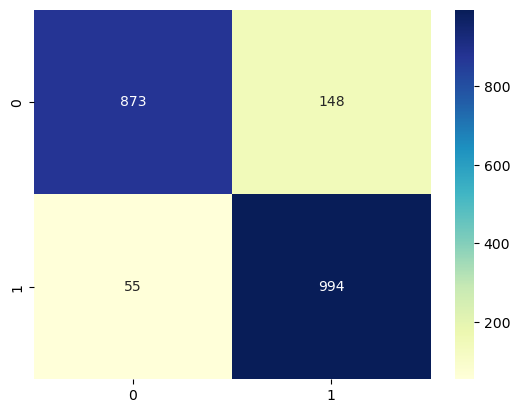

In [143]:
plt.style.use('default')
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.savefig('heatmap.png')
plt.show()

In [144]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_rf_best))

              precision    recall  f1-score   support

         0.0       0.94      0.86      0.90      1021
         1.0       0.87      0.95      0.91      1049

    accuracy                           0.90      2070
   macro avg       0.91      0.90      0.90      2070
weighted avg       0.91      0.90      0.90      2070



### Random Forest Classifier is the best model for the dataset...

## ROC AUC Curves

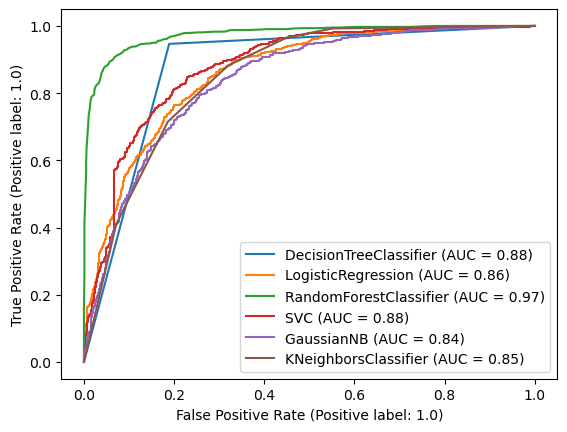

In [145]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(dec_tree,X_test,Y_test)
mod = [log_reg,ran_for,svc,nb,knn]

for i in mod:
    plot_roc_curve(i,X_test,Y_test, ax=disp.ax_)
plt.legend(prop = {'size':10}, loc = 'lower right')
plt.show()

## above graph says, Random Forest Classifier is the best model for the dataset with AUC score 0.97

## Best Model save

In [147]:
import joblib
joblib.dump(rf_best,"Best_data.pkl")

['Best_data.pkl']

In [148]:
mod = joblib.load("Best_data.pkl")
print(mod.predict(X_test))

[1. 0. 0. ... 1. 1. 1.]


In [149]:
# Predicting some of the X_test results and matching it with true i.e. y_test values using Random Forest.

a = np.array(Y_test)
predicted = np.array(mod.predict(X_test))
data_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
data_con

,orginal,predicted
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,1.0,1.0
...,...,...
2065,0.0,0.0
2066,0.0,1.0
2067,1.0,1.0
2068,0.0,1.0


## This is very good model . my prediction and actual data are same with high accuracy.in this dataset all coustomer are loyal and they donot want to switch his services.